In [21]:
import pandas as pd
import numpy as np


In [48]:
data = pd.read_csv("PSN_Dataset_06-12.csv")
malware = data[data['Label'] != "benign"].sample(n=1543, random_state=42)
benign = data[data['Label'] == "benign"].sample(n=1467, random_state=42)

data = pd.concat([malware, benign])
data.drop(columns=['MD5', 'SHA1', 'SHA256'], inplace=True)

data.shape


(3010, 237)

In [49]:
# delete columns that only have one value
for col in data.columns:
    if len(data[col].unique()) == 1:
        data.drop(col,inplace=True,axis=1)

print("After deleting columns with only one value")
print(data.shape)


After deleting columns with only one value
(3010, 207)


In [50]:
def mapping(label):
    if label == "benign":
        return 0
    else:
        return 1

data['Label'] = data['Label'].apply(mapping)
data['Label'].value_counts()


Label
1    1543
0    1467
Name: count, dtype: int64

In [51]:
# delete columns that have high correlation
corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
data.drop(to_drop, axis=1, inplace=True)


In [52]:
print(data.shape)


(3010, 127)


In [32]:
data.dropna(inplace=True)


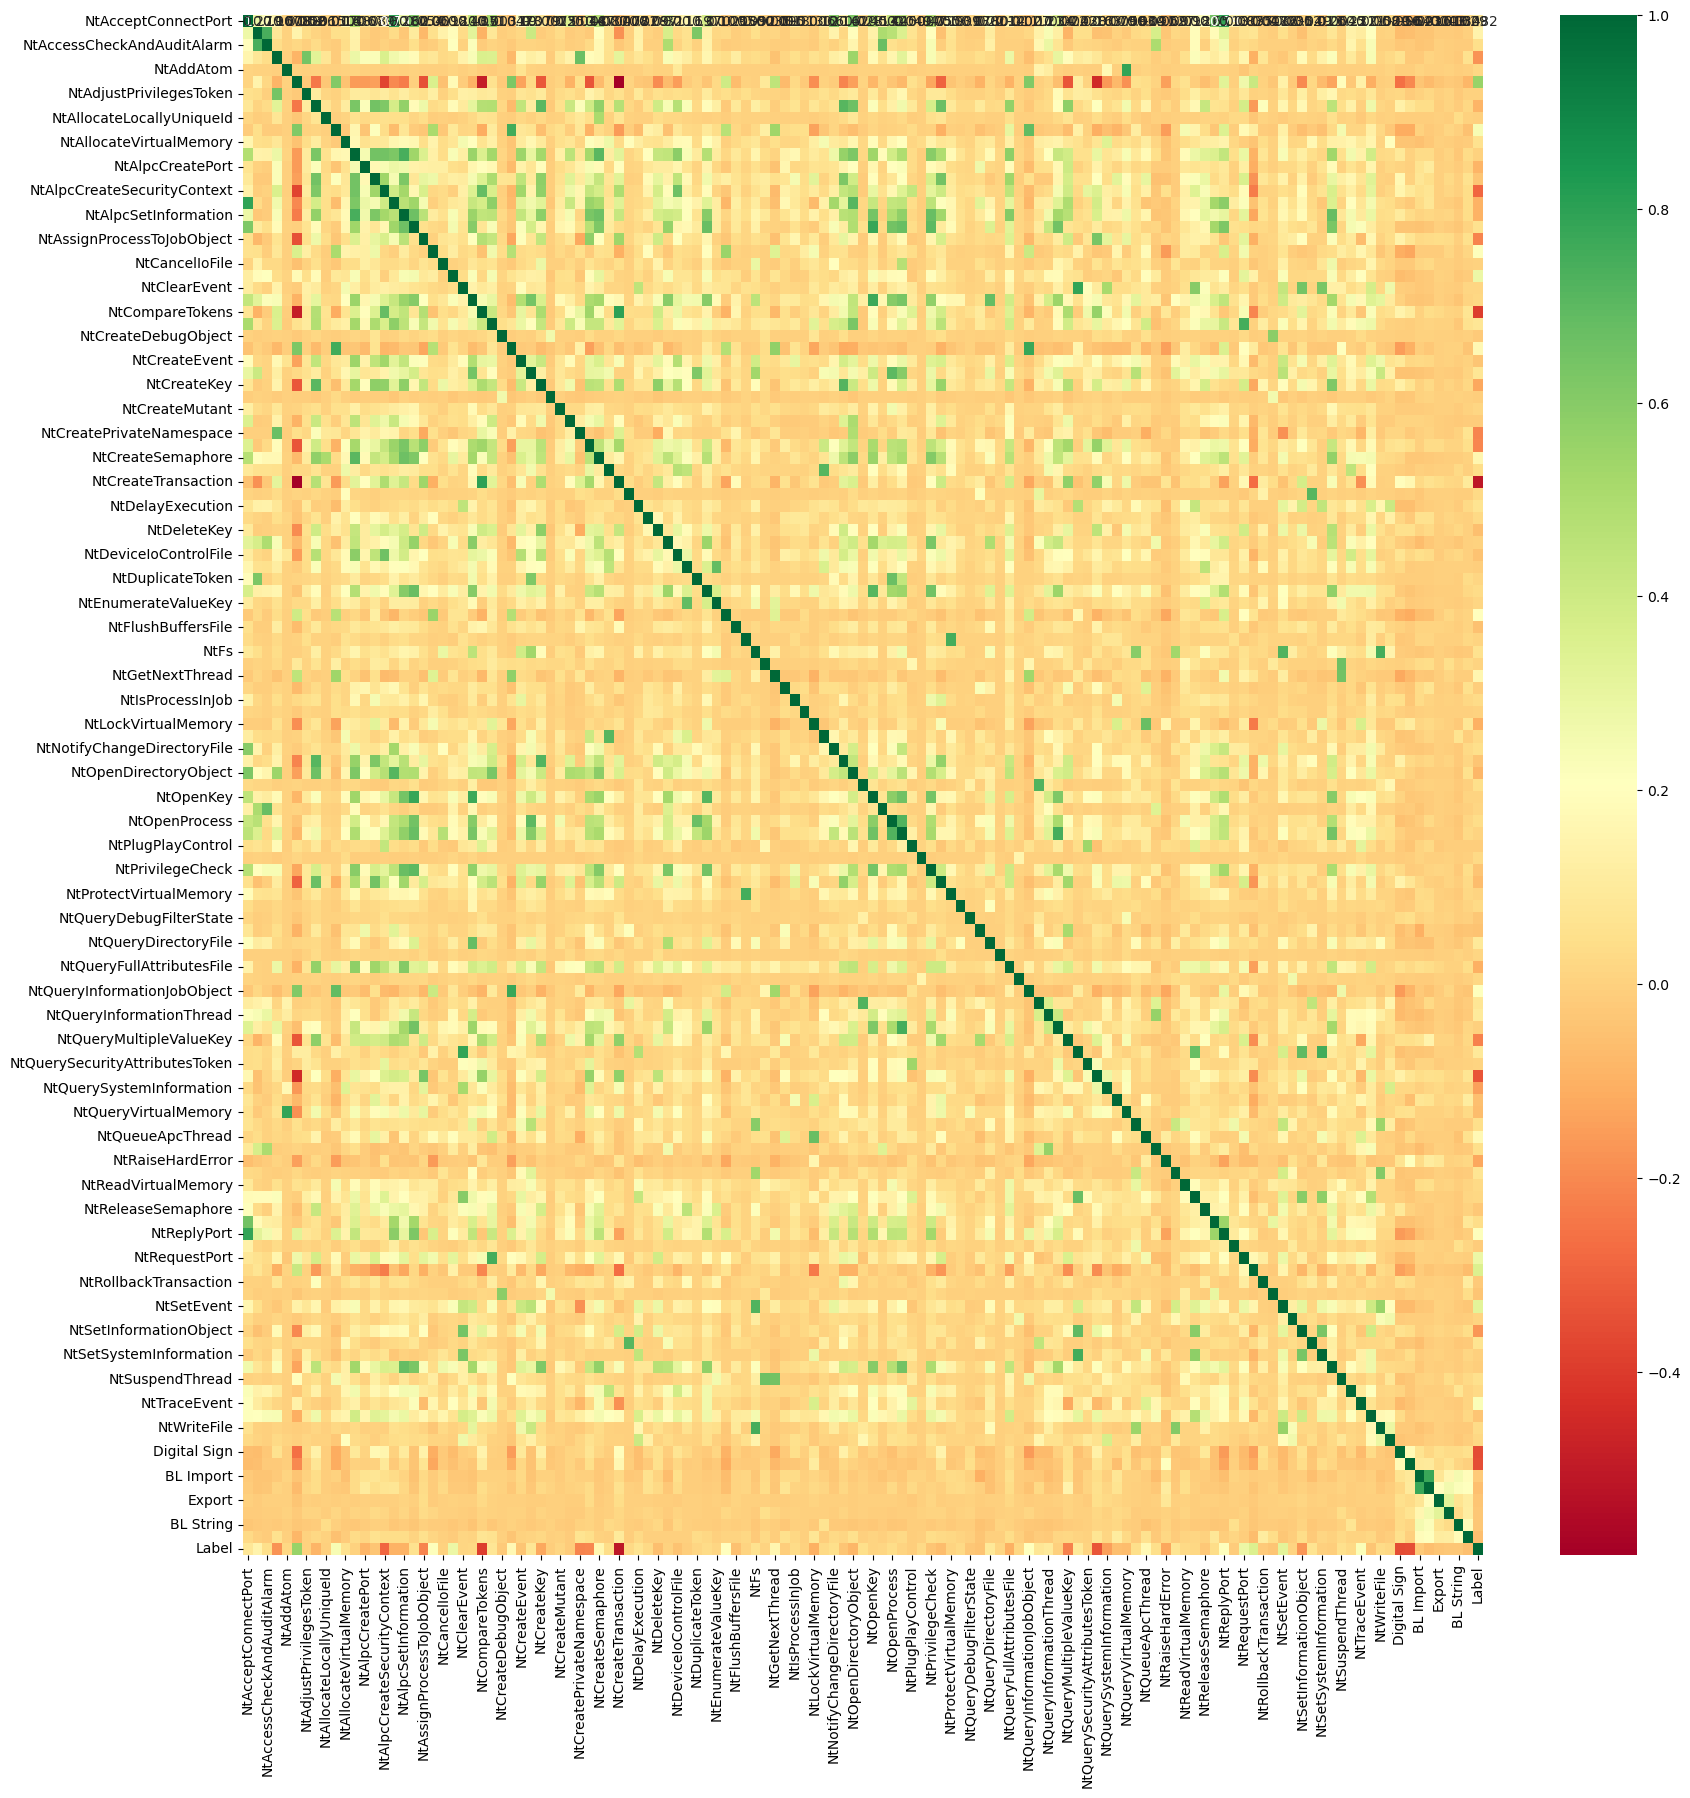

In [53]:
# draw heat map to see the correlation between labels and features
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")
plt.show()


In [47]:
print(data['Label'].value_counts())


Label
1    1543
0    1467
Name: count, dtype: int64


In [54]:
data.to_csv("PSN_Dataset_06-12_cleaned.csv", index=False)
